In [26]:
import glob
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [27]:
DataDir = 'ignore_folder/data'
Categories_all = ['a5df', 'a447', 'a440', 'a476', 'a67e', 'ae61', 'a470', 'a448', 'a9d2', 'a44a', 'a5d0', 'a569', 'acdb', 'a8e2', 'a558', 'a4ce', 'a4f1', 'a4e9', 'a6ca', 'b773', 'ab42', 'a8e4', 'a4e8', 'ad78', 'b944', 'a8c6', 'a6d1', 'a977', 'a57e', 'a8a3', 'a4d2', 'a6b3', 'a8ad', 'a740', 'a8bd', 'a8ae', 'a4a7', 'b3a3', 'a46c', 'a464', 'a656', 'a5fe', 'a455', 'a5c1', 'a658', 'b3be', 'a45d', 'a9fa', 'a46b', 'a9ce', 'a453', 'ac46', 'a454', 'b3bd', 'a5c9', 'a650', 'a668', 'a5fd', 'a5d5', 'a5aa', 'a5db', 'a7da', 'a5a6', 'a475', 'a5bf', 'adfb', 'a474', 'a473', 'afe0', 'a8c3', 'a55b', 'bec7', 'b54c', 'a6e7', 'a4ec', 'a4fb', 'a751', 'a56b', 'b0a8', 'a4f4', 'a6e6', 'a4e2', 'a6e8', 'a4e5', 'a4fd', 'bb50', 'ab48', 'a4c0', 'a4eb', 'b0aa', 'a8e0', 'a6a8', 'a6db', 'bb44', 'b16f', 'a8d3', 'a6b9', 'a540', 'a6d5', 'b0ea', 'aaf8', 'a8a7', 'a4d1', 'a4bd', 'a6b8', 'b6c0', 'a4a3', 'a548', 'a4a4', 'aaf7', 'b160', 'a6d3', 'aaf9', 'aacc', 'a86b', 'aa47', 'a467', 'b1d0', 'a451', 'a45f', 'a5ce', 'a457', 'adab', 'aa46', 'a46a']

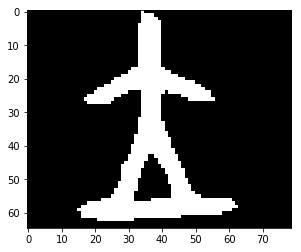

In [28]:
for category in Categories_all:
    path = os.path.join(DataDir,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [29]:
img_array.shape

(65, 79)

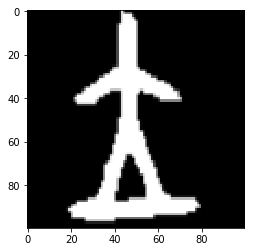

In [30]:
IMG_X = 100
IMG_Y = 100

new_array = cv2.resize(img_array, (IMG_Y, IMG_X)) # after checkning they need to be rearanged
plt.imshow(new_array, cmap='gray')
plt.show()

In [39]:
np.average(new_array, axis=1)

array([  3.28,   7.89,  13.4 ,  15.43,  17.46,  19.49,  21.72,  22.67,
        22.67,  22.67,  22.67,  22.67,  22.67,  22.66,  22.66,  22.67,
        22.67,  22.67,  22.67,  22.67,  22.67,  22.67,  22.67,  22.67,
        22.67,  23.37,  29.43,  35.75,  42.33,  50.64,  59.06,  67.59,
        76.01,  84.28,  92.34,  99.14, 101.83,  97.16,  88.01,  79.38,
        75.12,  58.74,  39.06,  24.3 ,  19.23,  19.24,  19.23,  19.23,
        19.32,  21.55,  23.7 ,  25.74,  25.82,  25.81,  25.81,  27.86,
        30.07,  32.07,  34.08,  35.54,  35.54,  37.  ,  39.02,  41.02,
        41.72,  41.7 ,  41.75,  40.56,  38.69,  41.06,  42.25,  42.25,
        40.17,  38.91,  38.9 ,  36.86,  35.28,  35.04,  36.63,  38.15,
        38.35,  40.09,  41.96,  42.11,  46.13,  55.89,  94.14, 122.25,
       142.41, 148.44, 150.54, 148.72, 140.43, 124.87,  99.72,  61.51,
        27.6 ,   4.46,   0.  ,   0.  ])

In [40]:
np.average(new_array, axis=0)

array([  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.5 ,   3.87,  12.14,  17.5 ,  22.85,  31.68,
        31.68,  34.27,  38.97,  44.04,  46.92,  50.19,  51.  ,  52.44,
        56.17,  62.65,  68.79,  81.33,  91.4 ,  94.78, 101.24, 112.91,
       115.74, 129.56, 171.23, 199.58, 196.76, 189.19, 185.66, 188.42,
       188.12, 190.52, 159.64, 107.9 ,  98.44, 104.2 , 105.91, 103.08,
        96.36,  87.29,  80.67,  70.36,  61.34,  57.85,  51.61,  45.69,
        43.22,  41.19,  34.81,  31.84,  31.17,  27.98,  22.51,  19.44,
        19.38,  17.32,  15.75,  15.75,  15.75,  10.01,   5.63,   2.48,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ])

In [75]:
training_data = []

def create_training_data():
    for category in Categories_all:
        path = os.path.join(DataDir, category)
        class_num = Categories_all.index(category)
        for img in os.listdir(path):
            if 'jinwen' in img:
                class_type = 'jinwen'
            if 'chuxi' in img:
                class_type = 'chuxi'
            if 'smallseal' in img:
                class_type = 'smallseal'
            if 'oracle' in img:
                class_type = 'oracle'
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_Y, IMG_X))
                training_data.append([new_array, class_num, class_type])
            except Exception as e:
                print('something went wrong')


In [82]:
create_training_data()

In [83]:
finger_print = []

def create_finger_print(data):
    for picture in data:
        horizontal_average = np.average(picture[0], axis=1)
        vertical_average = np.average(picture[0], axis=0)
        finger_print.append([horizontal_average, vertical_average, picture[1], picture[2]])

In [ ]:
create_finger_print(